# Pytrends Notebook 🐍
Test-Notebook für die Nutzung von [Pytrends](https://github.com/GeneralMills/pytrends). 
Package zur maschinellen Abfrage von Google Trends Daten (inoffizielle API).

🔥 Zusätzlich: timeseries decomposition mit statsmodels auf den Trend-Daten. 🔥

## Abfrage von Google Trends

In [1]:
# import pytrends Package
# props: https://github.com/GeneralMills/pytrends
from pytrends.request import TrendReq

In [2]:
# Neues pytrends Object
pytrends = TrendReq(hl='de-DE', tz=60)

In [3]:
# Keywordliste erstellen
# Bis zu 5 Keywords sind möglich
kw_list = ['seo','sea','sem']

In [4]:
# Abfrage erstellen
# Zeitraum hier 5 Jahre
pytrends.build_payload(kw_list,
                       cat=0,
                       timeframe='today 5-y',
                       geo='DE',
                       gprop='')

In [5]:
# Abfrage durchführen
# Unterschiedliche Abfragemethoden verfügbar
trend_df = pytrends.interest_over_time()

In [6]:
trend_df.head()

,seo,sea,sem,isPartial
date,,,,
2014-03-30,8,41,3,False
2014-04-06,9,45,4,False
2014-04-13,8,52,5,False
2014-04-20,7,48,4,False
2014-04-27,8,48,4,False


## Visualisierung mehrere Keywords mit Seaborn

In [15]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
# Seaborn für Visualisierung importieren
!pip install --upgrade seaborn
import seaborn as sns
# Plotgröße für alle Plots anpassen
sns.set(rc={'figure.figsize':(10,5)})

In [16]:
# Plot Daten vorbereiten
# Melting des Dataframes
plot_data = trend_df.iloc[:,0:len(trend_df.columns)-1]
plot_data = plot_data.reset_index() \
    .melt(id_vars='date', var_name='phrase', value_name='trend')

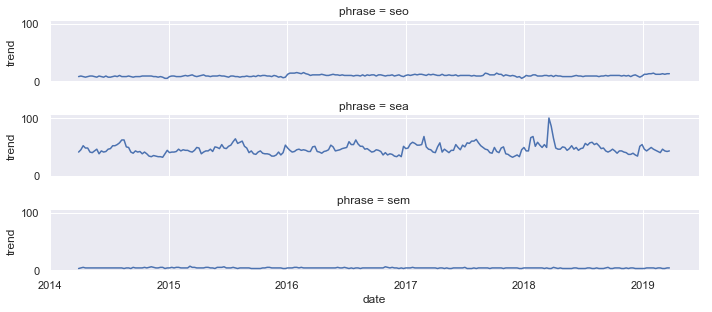

In [17]:
# Plot
g = sns.relplot(data=plot_data, x='date', y='trend',
                kind='line', row='phrase', height=1.5,
                aspect=6.7)

## Abweichende Daten bei einzelnen Keywords
**Achtung:** Wenn eine Phrase alleine abgefragt wird, gibt Google andere Werte aus. Werden mehrere Phrasen gemeinsam abgefragt, passen die "Trend-Verhältnisse" der normalisierten Werte zusammen.

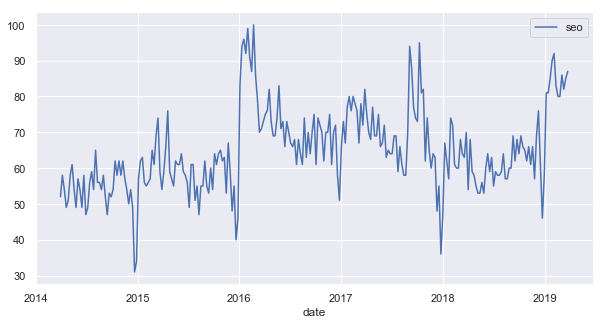

In [18]:
# Achtung ergibt unterschiedliche Werte,
# wenn Phrase alleine abgefragt wird
kw_list = ['seo']
pytrends.build_payload(kw_list,
                       cat=0,
                       timeframe='today 5-y',
                       geo='DE',
                       gprop='')
trend_df_single = pytrends.interest_over_time()
sns.lineplot(data=trend_df_single.iloc[:,0:1])
sns.despine()

## Timeseries Decomposition
Das statsmodel Package bietet einen der Wege, um Zeitreihen in ihre Komponenten zu zerlegen. Dieses Vorgehen wird z.B. beim Forcasting verwendet. 
Die Zeitreihe wird in ihre Bestandteile zerlegt, diese stehen dann einzeln zur Verfügung, bzw. können über eine Helper-Funktion gemeinsam geplottet werden.

In [19]:
# Import Statsmodels Api für time series decomposition
import statsmodels.api as sm

In [20]:
# Decompose für eine Zeitreihe ausführen
df = trend_df_single.iloc[:,0:1]
decompose = sm.tsa.seasonal_decompose(df,
                                      model='additive')

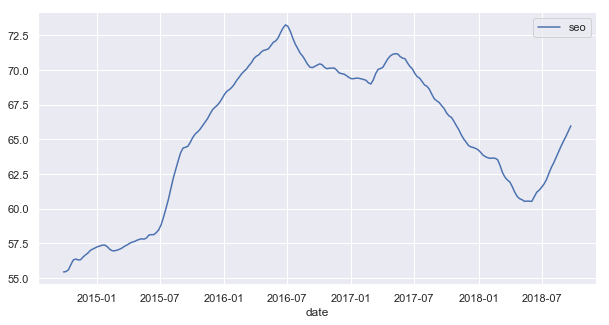

In [21]:
# Plot des Trends
sns.lineplot(data=decompose.trend)
sns.despine()

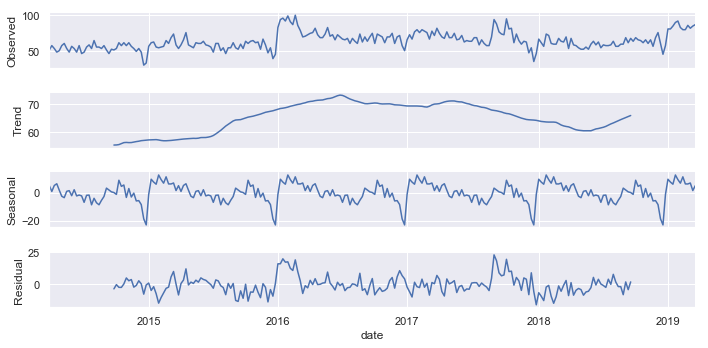

In [22]:
# Object enhält verschiedene Teile der Timeseries
# decompose.observed
# decompose.trend
# decompose.seasonal
# decompose.resid
# Über .plot() kann ein Facetgrid geplottet werden
decompose.plot()
sns.despine()